## Employee Salaries - 2017
Annual salary information including gross pay and overtime pay for all active, permanent employees of Montgomery County, MD paid in calendar year 2017. 
#This information will be published annually each year.
#source: https://data.montgomerycountymd.gov/Human-Resources/Employee-Salaries-2017/2qd6-mr43

In [31]:
## import packages:
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
from scipy import stats #  library of statistical functions
import scipy.interpolate as interp #  library for interpolating arrays
#
# Set seed for generating psuedo random numbers
np.random.seed(12345678)
#
# Set up graphics
plt.style.use('classic')
%matplotlib inline

## Load the CSV File.

In [32]:
empSalary2017 = pd.read_csv("Employee_Salaries_2017.csv")
type(empSalary2017)

pandas.core.frame.DataFrame

In [33]:
empSalary2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 12 columns):
Full Name                  9398 non-null object
Gender                     9398 non-null object
Current Annual Salary      9398 non-null float64
2017 Gross Pay Received    9398 non-null float64
2017 Overtime Pay          9398 non-null float64
Department                 9398 non-null object
Department Name            9398 non-null object
Division                   9398 non-null object
Assignment Category        9398 non-null object
Employee Position Title    9398 non-null object
Position Under-Filled      1088 non-null object
Date First Hired           9398 non-null object
dtypes: float64(3), object(9)
memory usage: 881.1+ KB


In [34]:
empSalary2017.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired
0,"Aarhus, Pam J.",F,70959.79,71316.72,0.00,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,NaN,9/22/86
1,"Aaron, Marsha M.",F,110359.00,108040.82,0.00,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Supervisory Social Worker,NaN,11/19/89
2,"Ababio, Godfred A.",M,55950.24,62575.19,7649.19,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,5/5/14
3,"Ababu, Essayas",M,95740.00,96055.94,0.00,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,NaN,3/5/07
4,"Abbamonte, Drew B.",M,74732.00,98736.78,23468.73,POL,Department of Police,PSB 6th District Special Assignment Team,Fulltime-Regular,Police Officer III,NaN,7/16/07


In [35]:
empSalary2017.tail()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired
9393,"Zupancic, Emily C.",F,62020.00,63336.97,332.15,POL,Department of Police,PSB 4th District Patrol,Fulltime-Regular,Police Officer III,Police Officer II,8/12/13
9394,"Zurita, Justina",F,76490.74,75656.14,0.00,HHS,Department of Health and Human Services,School Based Health Centers,Fulltime-Regular,Community Health Nurse II,NaN,11/3/15
9395,"Zuspan, Diane M.",F,172934.28,183244.67,896.64,FRS,Fire and Rescue Services,Human Resources Division,Fulltime-Regular,Fire/Rescue Division Chief,NaN,11/28/88
9396,"Zwerdling, David",M,107365.00,106704.52,0.00,HHS,Department of Health and Human Services,Child and Adolescent Mental Health Clinic Serv...,Parttime-Regular,Medical Doctor IV - Psychiatrist,NaN,4/30/01
9397,"Zyontz, Jeffrey L.",M,160454.00,160117.27,0.00,CCL,County Council,Council Central Staff,Fulltime-Regular,Manager II,NaN,9/5/06


In [36]:
#check columns
empSalary2017.columns

Index(['Full Name', 'Gender', 'Current Annual Salary',
       '2017 Gross Pay Received', '2017 Overtime Pay', 'Department',
       'Department Name', 'Division', 'Assignment Category',
       'Employee Position Title', 'Position Under-Filled', 'Date First Hired'],
      dtype='object')

In [37]:
empSalary2017.shape

(9398, 12)

## Eliminate Nan's from Dataframe and Resummarize

In [38]:
empSalary2017.dropna(inplace=True) # drop all rows with Nan's

empSalary2017.describe().T # basic stats

,count,mean,std,min,25%,50%,75%,max
Current Annual Salary,1088.0,58484.339357,14216.111250,34233.0,49354.0000,55629.00,63656.000,135963.93
2017 Gross Pay Received,1088.0,56019.819044,25068.069833,0.0,47246.4175,59458.14,71630.200,143291.33
2017 Overtime Pay,1088.0,5030.328980,6755.837935,0.0,42.2375,2469.24,7869.125,63869.48


In [39]:
empSalary2017.info() # summarize DataFrame object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 6 to 9393
Data columns (total 12 columns):
Full Name                  1088 non-null object
Gender                     1088 non-null object
Current Annual Salary      1088 non-null float64
2017 Gross Pay Received    1088 non-null float64
2017 Overtime Pay          1088 non-null float64
Department                 1088 non-null object
Department Name            1088 non-null object
Division                   1088 non-null object
Assignment Category        1088 non-null object
Employee Position Title    1088 non-null object
Position Under-Filled      1088 non-null object
Date First Hired           1088 non-null object
dtypes: float64(3), object(9)
memory usage: 110.5+ KB


In [40]:
empSalary2017.shape

(1088, 12)

# Bootstrapping Simulation

In [41]:
#Rename 
empSalary2017.rename(columns={'2017 Overtime Pay':'Overtime_Pay_2017'}, inplace=True)
empSalary2017.columns

Index(['Full Name', 'Gender', 'Current Annual Salary',
       '2017 Gross Pay Received', 'Overtime_Pay_2017', 'Department',
       'Department Name', 'Division', 'Assignment Category',
       'Employee Position Title', 'Position Under-Filled', 'Date First Hired'],
      dtype='object')

Text(0, 0.5, 'Frequency')

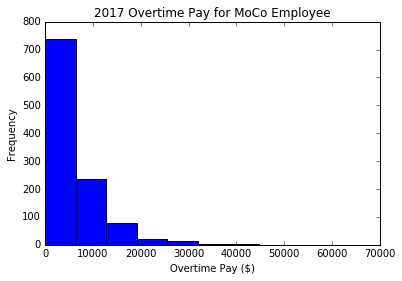

In [42]:
plt.hist(empSalary2017.Overtime_Pay_2017)
plt.title("2017 Overtime Pay for MoCo Employee")
plt.xlabel("Overtime Pay ($)")
plt.ylabel("Frequency")

In [43]:
empSalary2017.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,Overtime_Pay_2017,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired
6,"Abdalla, Eiman M.",F,63977.00,62177.20,184.56,FIN,Department of Finance,General Accounting,Fulltime-Regular,Accountant/Auditor III,Accountant/Auditor II,6/27/16
7,"Abdelhamed, Shereen N.",F,53274.00,50549.01,1872.92,POL,Department of Police,PSB 2nd District Patrol,Fulltime-Regular,Police Officer III,Police Officer I,1/9/17
9,"Abdool, Daniel Z.",M,50172.00,48567.94,1384.89,FRS,Fire and Rescue Services,Field Recruits,Fulltime-Regular,Firefighter/Rescuer III,Firefighter/Rescuer II,12/12/16
16,"Abedin, Amirreza",M,43108.96,48911.80,6939.36,DOT,Department of Transportation,Transportation Management,Fulltime-Regular,Traffic Management Technician II,Traffic Management Technician I,12/14/15
17,"Abell, Jennifer L.",F,49790.85,49246.54,5522.90,POL,Department of Police,MSB Communications Division,Fulltime-Regular,Public Safety Communications Specialist III,Public Safety Communications Specialist II,2/22/16


In [44]:
empSalary2017.Overtime_Pay_2017.median()

2469.24

In [45]:
data_sample = empSalary2017.Overtime_Pay_2017[np.random.choice(empSalary2017.Overtime_Pay_2017.index, 100)]
data_sample.median()

2346.055

In [46]:
resample_1 = data_sample.sample(100, replace=True)
resample_1.median()

1990.725

In [47]:
resample_2 = data_sample.sample(100, replace=True)
resample_2.median()

2346.055

In [48]:
resample_3 = data_sample.sample(100, replace=True)
resample_3.median()

2393.33

In [49]:
#np.random.seed(111)
resamples_medians = pd.Series(index = np.arange(1000))
for i in range(1000):
    resamples_medians[i] = data_sample.sample(100, replace=True).median()
    
print(resamples_medians.median())
print(resamples_medians.mean())
print(resamples_medians.quantile(0.025))
print(resamples_medians.quantile(0.975))


2346.035
2563.2858800000154
1568.1950000000002
4145.235


In [50]:
empSalary2017.Overtime_Pay_2017.index

Int64Index([   6,    7,    9,   16,   17,   28,   29,   36,   56,   59,
            ...
            9336, 9345, 9353, 9370, 9380, 9381, 9382, 9384, 9387, 9393],
           dtype='int64', length=1088)

## Non-parametric Simulations Bootstrapping

In [51]:
#Create a new variable that holds 2017 Overtime Pay, which will be used for the bootstrapping simulations.

empSalary2017 = empSalary2017['Overtime_Pay_2017']
type(empSalary2017)

pandas.core.series.Series

In [52]:
#Convert the mdtaxrt to a list in order to use it for the bootstrap simmulation.

empSalary2017_ls = empSalary2017.tolist()
print(type(empSalary2017_ls))

#Check to see the type of the elements inside the list, it should be floats. 
print(type(empSalary2017_ls[0]))

<class 'list'>
<class 'float'>


### Create variables to set up the simmulation.
For this example the number of iterations will be 2500.
The sample of each selection will be 85% of the original data.

In [53]:
n_iterations = 1000
n_size = int(len(empSalary2017) * .1)
print(n_size)

108


### Bootstrap simulation and calculate the mean and medians.

In [54]:
from sklearn.utils import resample
# run bootstrap
boot_samples = list()
mean_boot_samples = list()
median_boot_samples =list()

for i in range(n_iterations):
    #Runs the simmulation
    boot_sample = resample(empSalary2017_ls, n_samples=n_size)
    
    #Stores the samples into a list
    boot_samples.append(boot_sample)
   
    #calculates the mean of the sample and stores this mean in a different list.
    #means_boot_samples.append(boot_sample.mean()) # This code did not work for me. So I found a workaround using np.
    mean_boot_samples.append(np.mean(boot_sample))

    #calculates the median of the sample and stores this mean in a different list.
    #means_boot_samples.append(boot_sample.mean()) # This code did not work for me. So I found a workaround using np.
    median_boot_samples.append(np.median(boot_sample))    
    
print("The Length of the boot_samples is: " + str(len(boot_samples)))
#print("\nThe first element in the boot_samples list is: " + str(boot_samples[0]))
print("\nThe mean of the simulated data is: " + str(np.mean(mean_boot_samples)))
print("\nThe median of the simulated data is: " + str(np.median(median_boot_samples)))

The Length of the boot_samples is: 1000

The mean of the simulated data is: 5035.680662222221

The median of the simulated data is: 2475.25


### Statistics comparison of the bootstrap sample with the original number of Overtime Pay

In [55]:
sumdata1 = [['Mean',round(np.mean(empSalary2017_ls),2),round(np.mean(mean_boot_samples),2),round(np.mean(empSalary2017_ls)-np.mean(mean_boot_samples),2)],
            ['Median',round(np.median(empSalary2017_ls),2),round(np.median(median_boot_samples),2),round(np.median(empSalary2017_ls)-np.median(median_boot_samples),2)]
           ]

sumtable1 = pd.DataFrame(sumdata1,columns=['Stat','Original','Simulated','Delta'])

print(sumtable1)

     Stat  Original  Simulated  Delta
0    Mean   5030.33    5035.68  -5.35
1  Median   2469.24    2475.25  -6.01


In [56]:
conf_int = np.percentile(mean_boot_samples, [2.5, 97.5]) # The middle 95% interval
conf_int

array([3747.74015509, 6411.21045602])

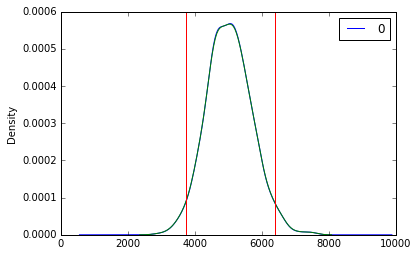

In [61]:
pd.DataFrame(mean_boot_samples).plot(kind='density')
sns.kdeplot(mean_boot_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

In [58]:
from sklearn.utils import resample
means_boot_samples = []
for i in range(1000):
                boot_sample = resample(resample_1) # does bootstrap; replace = True
                means_boot_samples.append(boot_sample.mean())
        
np.mean(mean_boot_samples)

5035.680662222221